![]("imagenes/itam.png")

# Proyecto final
## Computo matricial con algoritmo QR y Análisis Discriminante Lineal
## Optimización Otoño 2021
## Equipo 5

# 1. Introducción

En este reporte se presenta el resultado de la investigación e implementación del Análsis Discriminante Lineal (LDA por sus siglas en inglés) como un problema de optimización numérica. Para ello se verifica que el método LDA se acopla a un problema de optimización, se implementa un algoritmo que aproxime a la solución de LDA, se prueba la estabilidad del algoritmo implementado y, finalmente, se resuelve un problema de clasificación utilizando la implementación realizada. Lo anterior a fin de fortalecer la teoría vista en el curso de [optimización numérica](https://itam-ds.github.io/analisis-numerico-computo-cientifico/README.html) relacionada a un problema de estadística y aprendizaje de maquina, en este caso LDA, el cual se aborda desde la perspectiva de la optimización numérica. 


Se utilizan los datos de `heart.csv` obtenidos de [https://www.kaggle.com/ronitf/heart-disease-uci/version/1]. Esta base de datos contiene 303 registros y es un subconjunto de 14 atributos vinculados a enfermedad cardiovascular o enfermedad cardiaca, la cual se refiere a afecciones que involucran vasos sanguineos bloquedos que pueden causar un dolor de pecho, ataque cerebro vascular o un ataque cardiaco. Las variables que se encuenttran en la base de datos son: 1) Edad, 2) sexo, 3) tipo de dolor en el pecho (4 valores), 4) presión arterial en reposo, 5) colestoral sérica en mg / dl, 6) azúcar en sangre en ayunas> 120 mg / dl, 7) resultados electrocardiográficos en reposo (valores 0,1,2), 8) frecuencia cardíaca máxima alcanzada, 9) angina inducida por ejercicio, 10) oldpeak = depresión del ST inducida por el ejercicio en relación con el reposo, 11) la pendiente del segmento ST de ejercicio pico, 12) número de vasos principales (0-3) coloreados por la floración, 13) thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible, más detalles sobre las variables ver [EDA](https://github.com/vserranoc/proyecto-final-equipo-5/blob/main/notebooks/EDA.ipynb). 


En los pasos siguientes mostramos la metodología, la aplicación y los resultados obtenidos.

# 2. Metodología

## 2.1 Análisis de Discriminate Lineal

El método *análisis de discriminante lineal* (en inglés Linear Discriminant Analysis (LDA), Fisher, 1936) es una técnica estadística para reducir dimensionalidad que además permite separar en clases el conjunto de datos. El método para dos clases fue propuesto por Fisher, mientras que la generalización a múltiples clases la propuso Rao (1948).

Es una técnica similar a Componentes Principales (ver, por ejemplo [ref](https://itam-ds.github.io/analisis-numerico-computo-cientifico/2.computo_matricial/2.4/Valores_vectores_singulares_y_algoritmos_para_calcular_la_SVD.html#ejemplo-componentes-principales)), en cuanto a que permite encontrar las componentes que maximizan la varianza de los datos, pero además LDA maximiza la separación entre las diferentes clases. 

Es decir, LDA permite proyectar un espacio de características (un conjunto de datos $n$-dimensional) a un subespacio $k$ (con $k \leq n-1$) pero manteniendo la información que permite discriminar entre clases. 

**Descripción de la problemática** 

> Nota: Esta parte esta basada en las notas de [Yang Xiaozhou](https://yangxiaozhou.github.io/data/2019/10/02/linear-discriminant-analysis.html).

Considere un problema genérico de clasificación: Una variable aleatoria $X$ proviene de una de $K$ clases, con densidad dada por $f_k(\mathbf{x})$ on $\mathbb{R}^p$. Una regla discriminante trata de dividir el conjunto de datos en $K$ regiones disjuntas (que no se intersectan) $\mathbb{R}_1, \dots, \mathbb{R}_K$ que representan a la totalidad de las clases. Con estas regiones, la clasificación por análisis discriminante significa que asignamos $\mathbf{x}$ a una clase $j$ si $\mathbf{x}$ esta en la región $j$. La pregunta entonces es, ¿cómo conocemos a que región pertenece $\mathbf{x}$?

De manera natural podemos seguir dos reglas: 

* Regla de máxima verosimilitud: si asumimos que cada clase puede ocurrir con igual probabilidad, entonces asignamos  $\mathbf{x}$ a la clase $j$ si $j = \arg\max_i f_i(\mathbf{x})$.
* Regla Bayesiana: Si *a priori* conocemos las probabilidaddes de cada clase  $\pi_1, \dots, \pi_K$, entonces asignamos $\mathbf{x}$ a la clase $j$ si $j = \arg\max_i \pi_i f_i(\mathbf{x}) $.



**Función discriminante de Fisher**
> Esta parte esta basada en el libro Applied multivariate statistical analysis de Hardle y Simar (2019)

La proyeción LDA se define como la combinación lineal de las observaciones de la forma

$$ Y = Xa$$

entonces la suma de cuadrados totales de $y$: $\sum_{i = 1}^{n}(y_i - \bar{y})^2$, es igual a 

$$ Y^T\mathbb{H}Y = a^TX^T\mathbb{H}Xa = a^T\mathbb{T}a$$

con la matriz centrada $\mathbb{H} = I-n^{-1}1_n1_n^T$ y $\mathbb{T} = X^T\mathbb{H}X$.

Supongamos que tenemos las muestras $X_j$ $j = 1, \dots J$, de $J$ poblaciones. La sugerencia de Fisher es encontrar la combinación lineal $a^TX$ que **maximice** el cociente de la *suma de cuadrados entre-grupos* entre *la suma de cuadrados dentro-de-los-grupos*.

La suma de cuadrados dentro-de-los-grupos esta dada por 

$$ \sum_{j = 1}^J Y_j^T\mathbb{H}_jY_j =\sum_{j = 1}^Ja^TX_j^T\mathbb{H}X_ja=a^T\mathbb{W}a $$

donde $Y_j$ denota la $j$-ésima sub-matriz de $Y$ correspondiente a las observaciones del grupo $j$ y $\mathbb{H}_j$ denota la $(n_j \times n_j)$ matriz centrada. Esta suma mide la suma de variaciones dentro de cada grupo. 


Por otro lado, la suma de cuadrados entre-grupos es

$$ \sum_{j = 1}^J n_j (\bar{y}_j-\bar{y})^2 = \sum_{j = 1}^J n_j \{a^T(\bar{x}_j-\bar{x})\}^2 = a^T\mathbb{B}a $$

donde $ \mathbb{B} = \sum_{j=1}^{J} (\bar{x}_j - \bar{x}) (\bar{x}_j - \bar{x})^T$,  $\bar{y}_j$ y $\bar{x}_j$ denotan los promedios muestrales de $Y_j$ y $X_j$, es decir los promedios de $j$-ésima sub-matriz de $Y$ o $X$ correspondiente a las observaciones del grupo $j$. Además $\bar{y}$ y $\bar{x}$ denotan los promedios de $Y$ y $X$. La suma de cuadrados entre-grupos mide la variación de medias a lo largo de los grupos.

La suma de cuadrados totales es entonces, la suma de cuadrados dentro-de-los-grupos y la suma de cuadrados entre-grupos, i.e.

$$ a^T\mathbb{T}a = a^T\mathbb{W}a + a^T\mathbb{B}a$$

La idea de Fisher es seleccionar el vector de proyección $a$ que maximice el cociente 

$$ \frac{a^T\mathbb{B}a}{a^T\mathbb{W}a}$$


La solución se encuentra aplicando el siguiente Teorema

> Si $A$ y $B$ son simétricas y $B \gt 0$, entonces el máximo de $\frac{x^TAx}{x^TBx}$ esta dado por el eigenvalor más grande de $B^{-1}A$.

> Def: $B > 0 $ (**positiva definida**) si y solo si $\forall \lambda_i > 0, i = 1, \dots p$ 


entonces la solución es:

> El vector $a$ que maximiza $\frac{a^T\mathbb{B}a}{a^T\mathbb{W}a}$ es el eigenvector $\mathbb{W}^{-1}\mathbb{B}$, que corresponde al eigenvalor más alto.


## 2.2 Algoritmo QR

El algoritmo QR es un algoritmo empleado para el cálculo de valores y vectores propios de una matriz, este algoritmo se basa en la descomposición o factorización QR, la cual consiste en descomponer la matriz en el producto de una matriz ortogonal y una triangular superior. Con base en las notas del curso de Optimización 2021, [***Cómputo matricial***](https://itam-ds.github.io/analisis-numerico-computo-cientifico/2.computo_matricial/2.3/Algoritmos_y_aplicaciones_de_eigenvalores_eigenvectores_de_una_matriz.html) se tiene que:

* La factorización $QR$ puede escribirse en una forma "delgada" obteniéndose la factorización [***thin QR* o *reduced***](https://en.wikipedia.org/wiki/QR_decomposition#Rectangular_matrix) :

$A$=$Q_1$$R_1$

Donde $Q_1$ no se nombra ortogonal sino con **columnas ortonormales** y  $R_1$ es triangular superior. Si el *rank(A)* es igual a $n$ ($A$ se nombra de **rank completo** o *full rank*) y $R_1$ tiene entradas en la diagonal positivas, la factorización *thin QR* es única.

* La factorización *thin* o *reduced* $QR$ de $A$ realiza un cambio de bases entre las columnas de $A$ y las columnas de $Q_1$ teniendo las entradas de $R$ las coordenadas del cambio entre bases.


* La factorización *QR* puede calcularse con reflexiones de Householder o rotaciones Givens.

Este método QR produce una secuencia de transformaciones ortogonales de la forma $Q_k^TAQ_k$ con el objetivo de hacer "más diagonal" a la matriz $A \in \mathbb{R}^{n \times n}$.

Si la matriz $A$ es simétrica y $Q_0$ es una matriz con columnas linealmente independientes entonces el esquema iterativo:

$$T_k = (Q_0 Q_1 \cdots Q_k)^T A(Q_0 Q_1 \cdots Q_k)$$

**casi siempre** converge a una matriz diagonal en la que se encuentran los eigenvalores de $A$. Se tienen suposiciones que garantizan la convergencia: 1)     $A \in \mathbb{R}^{n \times n}$ es simétrica, 2)     $|\lambda_1| > |\lambda_2| > \cdots > |\lambda_n| $ y 3)     El coseno del ángulo entre las columnas de $Q_0$ y las columnas de $Q$ que contienen los eigenvectores de $A$ es diferente de cero (no ortogonales).


* El criterio de paro es de la forma:

```
while off(T_k) > tol ||T_k||_F && iterations < max_iters
```

con `tol` una cantidad pequeña y positiva (comúnmente menor o igual a $10^{-8}$), `||T_k||_F` norma de Frobenius de $T_k$, `iterations` un contador de las iteraciones y $\text{off}(T) = \sqrt{\displaystyle \sum_{i=1}^n \sum_{j=1, j\neq i}^n t_{ij}^2}$ (norma de Frobenius de $T$ sin la diagonal.


# 3. Problema de optimización

En general, LDA es utilizado para problemas de clasificación, reducción de dimensionalidad y visualización de datos. El objetivo del problema de optimización de LDA por aproximación de Fisher es minimizar la varianza de los grupos que clasifica y minimizar la varianza dentro de cada grupo. Resuelto este problema, el proceso sigue con la clasificación las observaciones, dadas una probabilidad y criterios, con las variables discriminantes. 

En particular, en este trabajo empleamos LDA para reducir la dimensionalidad proyectando los datos de entrada a un espacio lineal que consiste en determinar las direcciones que maximizan la separación de las clases o grupos. El objetivo del trabajo es la clasificación de los grupos de pacientes que, dadas sus características, presentan la enfermedad de los que no la presentan. Para ello, se resuelve el problema de optimización, descrito en la sección anterior de la función del discriminante de Fisher, el cual consiste en seleccionar el vector de proyección que maximice el cociente: $$ \frac{a^T\mathbb{B}a}{a^T\mathbb{W}a}$$
 
Fisher propone una reducción de dimensionalidad formado por las combinaciones lineales de los predictores que mejor explican la separación de los grupos. Una vez realizado lo anterior, se realiza la clasificación de un subespacio de menor dimensión. En particular, el problema consiste en encontrar la dirección en la que la varianza entre cada clase se maximiza (numerador) y la varianza entre cada grupo se minimiza (denominador). El problema es equivalente al siguiente problema debido a que el escalamiento de $a$ no afecta la solución: 


$$\displaystyle \min{(a)} ={a^T\mathbb{B}a}$$ 

$$s.a.: {a^T\mathbb{W}a}$$

Para implementación del problema de optimización se realizaron los siguientes pasos:

1. Se realiza el escalamiento de las variables.
2. Se obtienen los eigenvectores.
3. Se ordenan los eigenvalores.
4. Se selecciona el eigenvector más alto asociado a los eigenvalores ordenados.
5. Una vez que se encuentra el eigenvector más alto, se transforma al nuevo subespacio que consiste en las direcciones que maximizan las separación de las clases.

El resultado obtenido se compara con los resultados obtenidos con la función de [scikit-learn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)

# 4. Aplicación a base de datos sobre enfermedad cardiovascular

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

np.set_printoptions(precision=3)

os.chdir("../")
#from modulos.read_data import get_dataset
from codigo.lda import lda_f

## 4.1 Proceso de lda paso por paso

### a. Se realiza el escalamiento de las variables

In [4]:
df = pd.read_csv("data/heart.csv", sep=",")
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

### b. Obtención del vector de medias por clase

In [5]:
features=[x for x in df.columns if x!="target"]
m0=[]
m1=[]
m=[]
for c in features:
    aux=df[[c,"target"]].groupby(["target"]).agg({c:"mean"}).reset_index()
    m0.append(aux[aux["target"]==0].values[0][1])
    m1.append(aux[aux["target"]==1].values[0][1])
    m.append(df[c].mean())
m0=np.array(m0)
m1=np.array(m1)
m=np.array(m)

In [6]:
print("Medias por feature para la clase 0:")
print(m0)
print("\nMedias por feature para la clase 1:")
print(m1)
print("\nMedias por feature para toda la población:")
print(m)

Medias por feature para la clase 0:
[0.575 0.826 0.159 0.381 0.286 0.159 0.225 0.52  0.551 0.256 0.583 0.292
 0.848]

Medias por feature para la clase 1:
[0.49  0.564 0.459 0.333 0.265 0.139 0.297 0.668 0.139 0.094 0.797 0.091
 0.707]

Medias por feature para toda la población:
[0.528 0.683 0.322 0.355 0.275 0.149 0.264 0.6   0.327 0.168 0.7   0.182
 0.771]


### c. Within-class scatter matrix SW

In [7]:
s0=df[df["target"]==0][features]
s0=np.array(s0)-m0
s0=s0.T @ s0

s1=df[df["target"]==1][features]
s1=np.array(s1)-m1
s1=s1.T @ s1

SW=s0+s1

SW.shape

(13, 13)

### d. Between-class scatter matrix SB

In [8]:
N0=df[df["target"]==0].shape[0]
p0=((m0-m).reshape(-1,1) @ (m0-m).reshape(1,-1))*N0

N1=df[df["target"]==1].shape[0]
p1=((m1-m).reshape(-1,1) @ (m1-m).reshape(1,-1))*N1

SB=p0+p1

SB.shape

(13, 13)

### e. Solving the generalized eigenvalue problem for the matrix $SW^{-1}SB$

In [9]:
R=np.linalg.solve(SW,SB)
eig_vals, eig_vecs = np.linalg.eig(R)

In [10]:
# Los ordeno de mayor a menor en función de los eigenvalores
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

### f. Seleccionar los eigenvalores con mayor aportación

In [11]:
print('Eigenvalores de mayor a menor:\n')
for i in eig_pairs:
    print('{0:.2e}'.format(i[0]))

Eigenvalores de mayor a menor:

1.07e+00
1.25e-16
9.31e-17
3.51e-17
3.51e-17
1.96e-17
1.77e-17
1.77e-17
1.27e-17
1.27e-17
7.17e-18
2.41e-19
0.00e+00


In [12]:
print('Varianza explicada:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalor {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Varianza explicada:

eigenvalor 1: 100.00%
eigenvalor 2: 0.00%
eigenvalor 3: 0.00%
eigenvalor 4: 0.00%
eigenvalor 5: 0.00%
eigenvalor 6: 0.00%
eigenvalor 7: 0.00%
eigenvalor 8: 0.00%
eigenvalor 9: 0.00%
eigenvalor 10: 0.00%
eigenvalor 11: 0.00%
eigenvalor 12: 0.00%
eigenvalor 13: 0.00%


In [13]:
W = np.hstack((eig_pairs[0][1].reshape(13,1), eig_pairs[1][1].reshape(13,1)))

### g. Transformamos al nuevo sub-espacio

In [14]:
X=np.array(df[features])
Y=np.array(df["target"])
X_lda=X@W
X_lda=pd.DataFrame(X_lda,columns=["LDA1","LDA2"])
X_lda["target"]=Y

In [15]:
X_lda.head()

,LDA1,LDA2,target
0,-0.025377+0.000000j,0.557789+0.000000j,1.0
1,-0.147313+0.000000j,0.280873+0.000000j,1.0
2,0.157810+0.000000j,-0.228053+0.000000j,1.0
3,0.053635+0.000000j,0.125278+0.000000j,1.0
4,-0.094121+0.000000j,-0.000653+0.000000j,1.0


/home/mariana/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/mariana/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


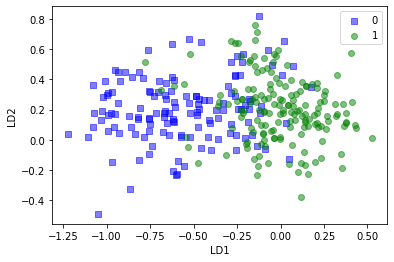

In [16]:
for label,marker,color in zip(range(0,2),('s', 'o'),('blue', 'green')):
    plt.scatter(
        x=X_lda[X_lda["target"]==label]["LDA1"],
        y=X_lda[X_lda["target"]==label]["LDA2"],
        marker=marker,
        color=color,
        alpha=0.5,
        label=label
    )
plt.xlabel('LD1')
plt.ylabel('LD2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## 4.2 LDA via scikit-learn

In [17]:
sklearn_lda = LDA(solver='eigen',store_covariance=True)
X_lda_sklearn = sklearn_lda.fit(X, Y)

In [18]:
X_lda_sklearn.coef_

array([[-0.329, -1.638,  2.826, -1.764, -1.294,  0.145,  0.833,  3.306,
        -1.204, -3.046,  1.32 , -3.363, -2.985]])

In [19]:
X_lda_sklearn.means_

array([[0.575, 0.826, 0.159, 0.381, 0.286, 0.159, 0.225, 0.52 , 0.551,
        0.256, 0.583, 0.292, 0.848],
       [0.49 , 0.564, 0.459, 0.333, 0.265, 0.139, 0.297, 0.668, 0.139,
        0.094, 0.797, 0.091, 0.707]])

In [20]:
print("Medias por feature para la clase 0:")
print(m0)
print("\nMedias por feature para la clase 1:")
print(m1)
print("\nMedias por feature para toda la población:")
print(m)

Medias por feature para la clase 0:
[0.575 0.826 0.159 0.381 0.286 0.159 0.225 0.52  0.551 0.256 0.583 0.292
 0.848]

Medias por feature para la clase 1:
[0.49  0.564 0.459 0.333 0.265 0.139 0.297 0.668 0.139 0.094 0.797 0.091
 0.707]

Medias por feature para toda la población:
[0.528 0.683 0.322 0.355 0.275 0.149 0.264 0.6   0.327 0.168 0.7   0.182
 0.771]


## 4.3 Error relativo utilizando aproximación a los eigenvalores y eigenvectores

In [24]:
error_relativo=[]
for i in range(10,510,10):
    aprox=lda_f(df=df,target="target",n_features=2,aprox_eigen=True,iterations=i,shift=False)
    real=lda_f(df=df,target="target",n_features=2,aprox_eigen=False)
    error_relativo.append(np.linalg.norm(np.array(aprox[[0,1]])-np.array(real[[0,1]]),2)/np.linalg.norm(np.array(real[[0,1]]),2))  

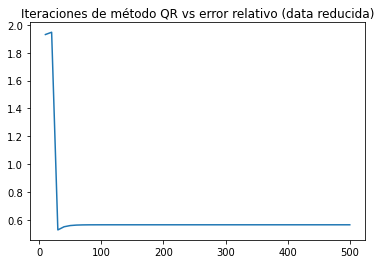

In [25]:
plt.plot(range(10,510,10),error_relativo)
plt.title("Iteraciones de método QR vs error relativo (data reducida)")
plt.show()

## 5. Conclusiones

Se resolvió el problema de optimización definido en la sección 3. Mediante LDA se redujo la dimensionalidad del problema y se clasificaron los grupos en aquellos que presentaron la enfermedad (target=1) y los que no presentaron la enfermedad (target=0) en el corazón. 

Al resolver el problema general del eigenvalor para la matriz se determinó que el eigenvalor 1 explicaba 100% de la varianza. 

En la gráfica de iteraciones del método de QR vs el error relativo, observamos que se va reduciendo conforme más iteraciones hay, pero alrededor de la iteración 40, se estabiliza.

## Referencias 

[Curso de Optimización](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico)

[Wikipedia. LDA](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

[Algoritmo QR](https://es.wikipedia.org/wiki/Algoritmo_QR) 

[Fisher LDA](https://www.asc.ohio-state.edu/lee.2272/talks/cimat15-part2.pdf)

[Linear Discriminant Analysis, Explained](https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b)

# Anexo

Se adjunta evidencia en AWS.

In [2]:
from IPython.display import Image

**Instancia**

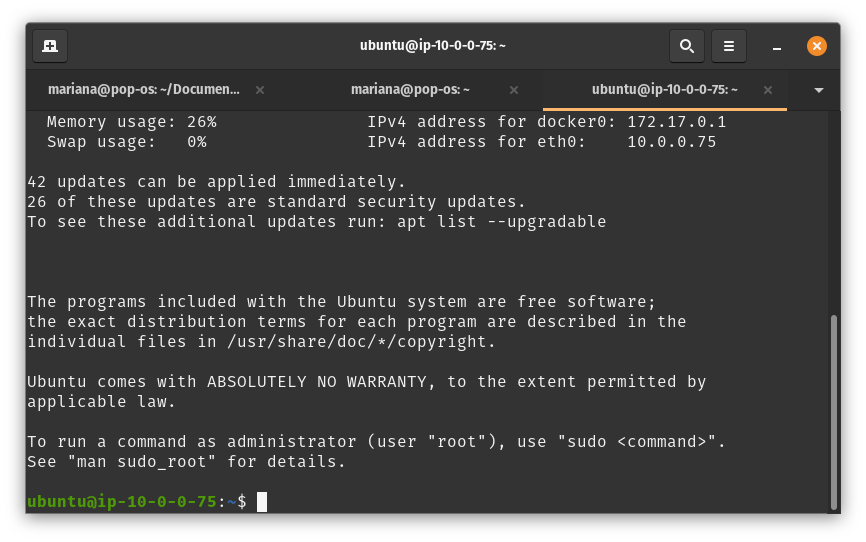

In [27]:
Image(filename='imagenes/instancia.png')

**Docker**

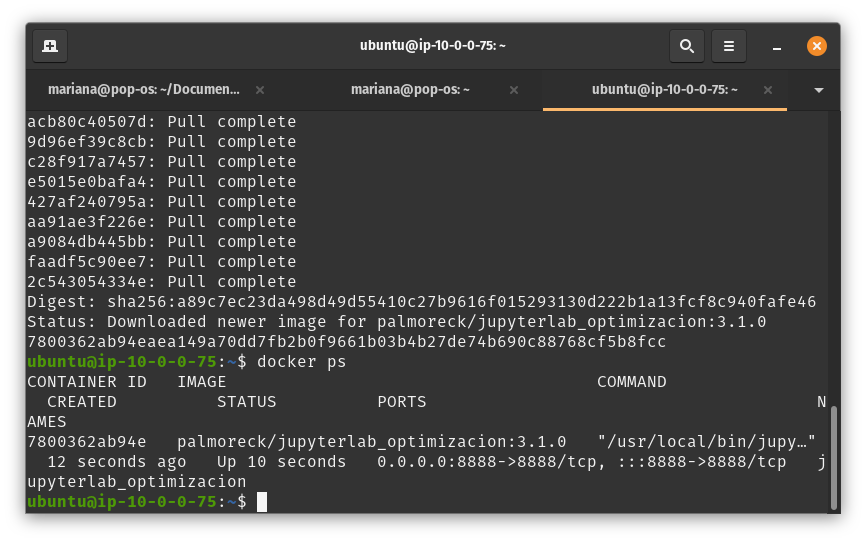

In [29]:
Image(filename='imagenes/docker.png')

**Reporte Final**

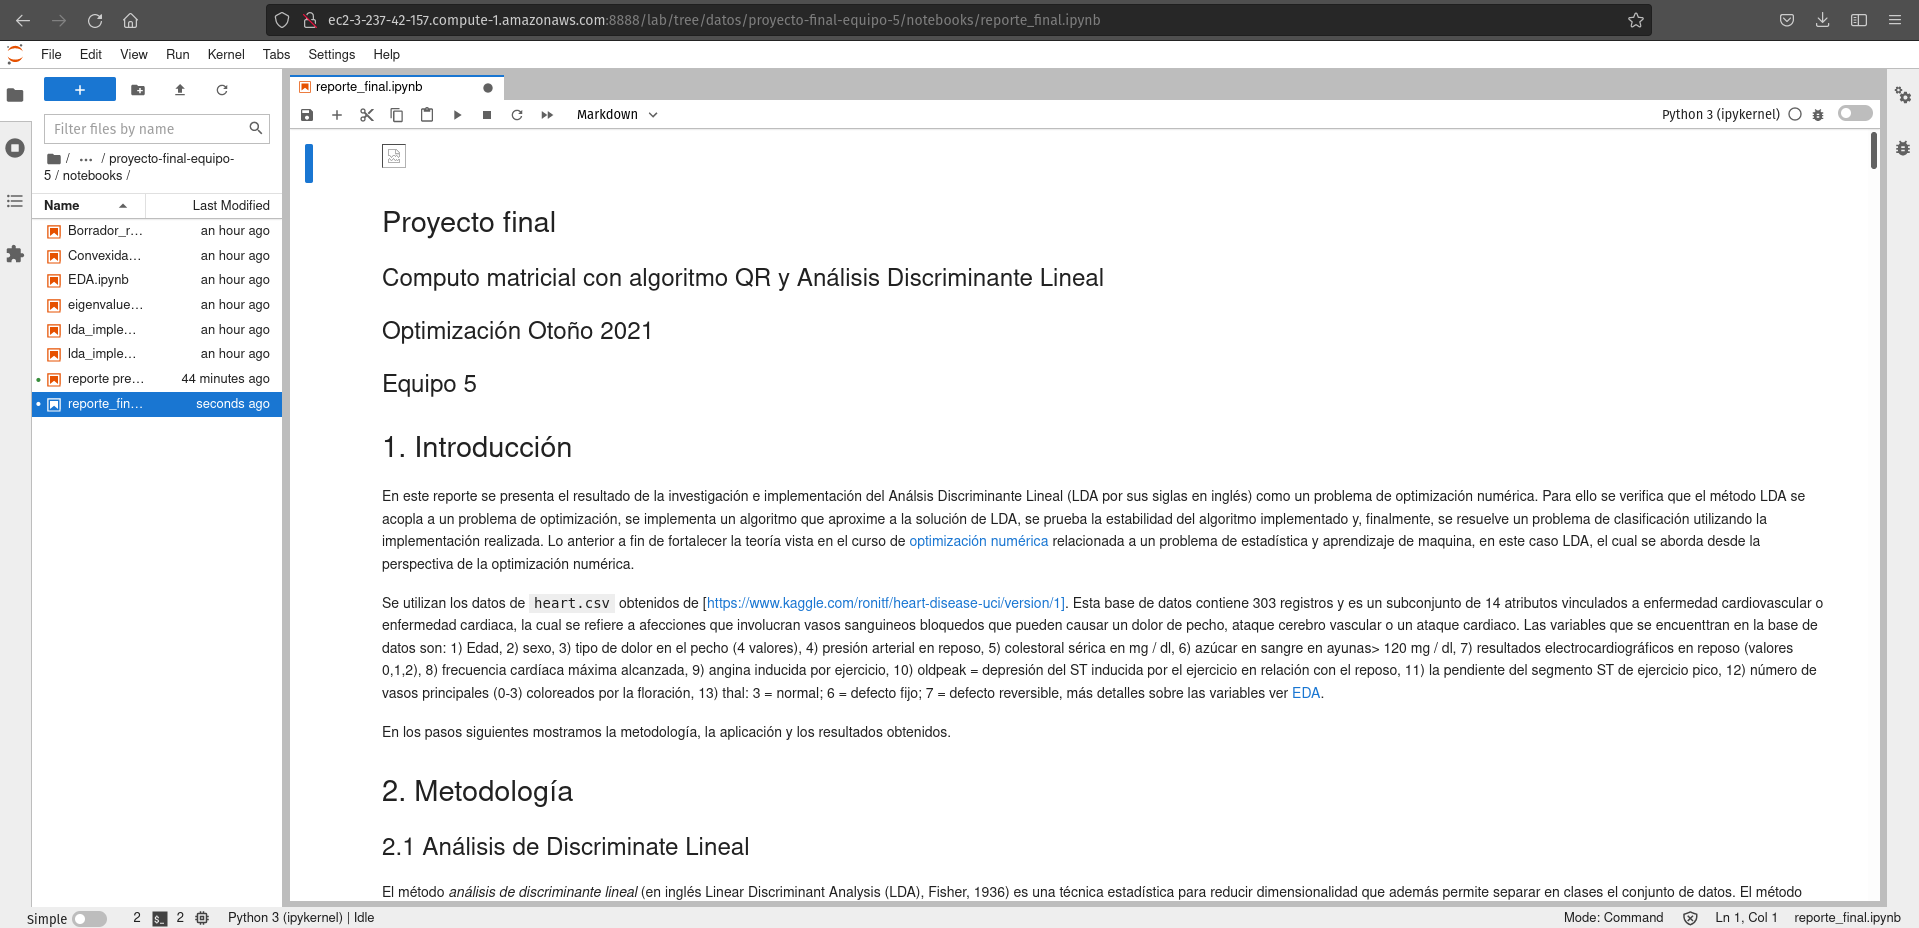

In [5]:
Image(filename='imagenes/reporte.png')

**Resultados**

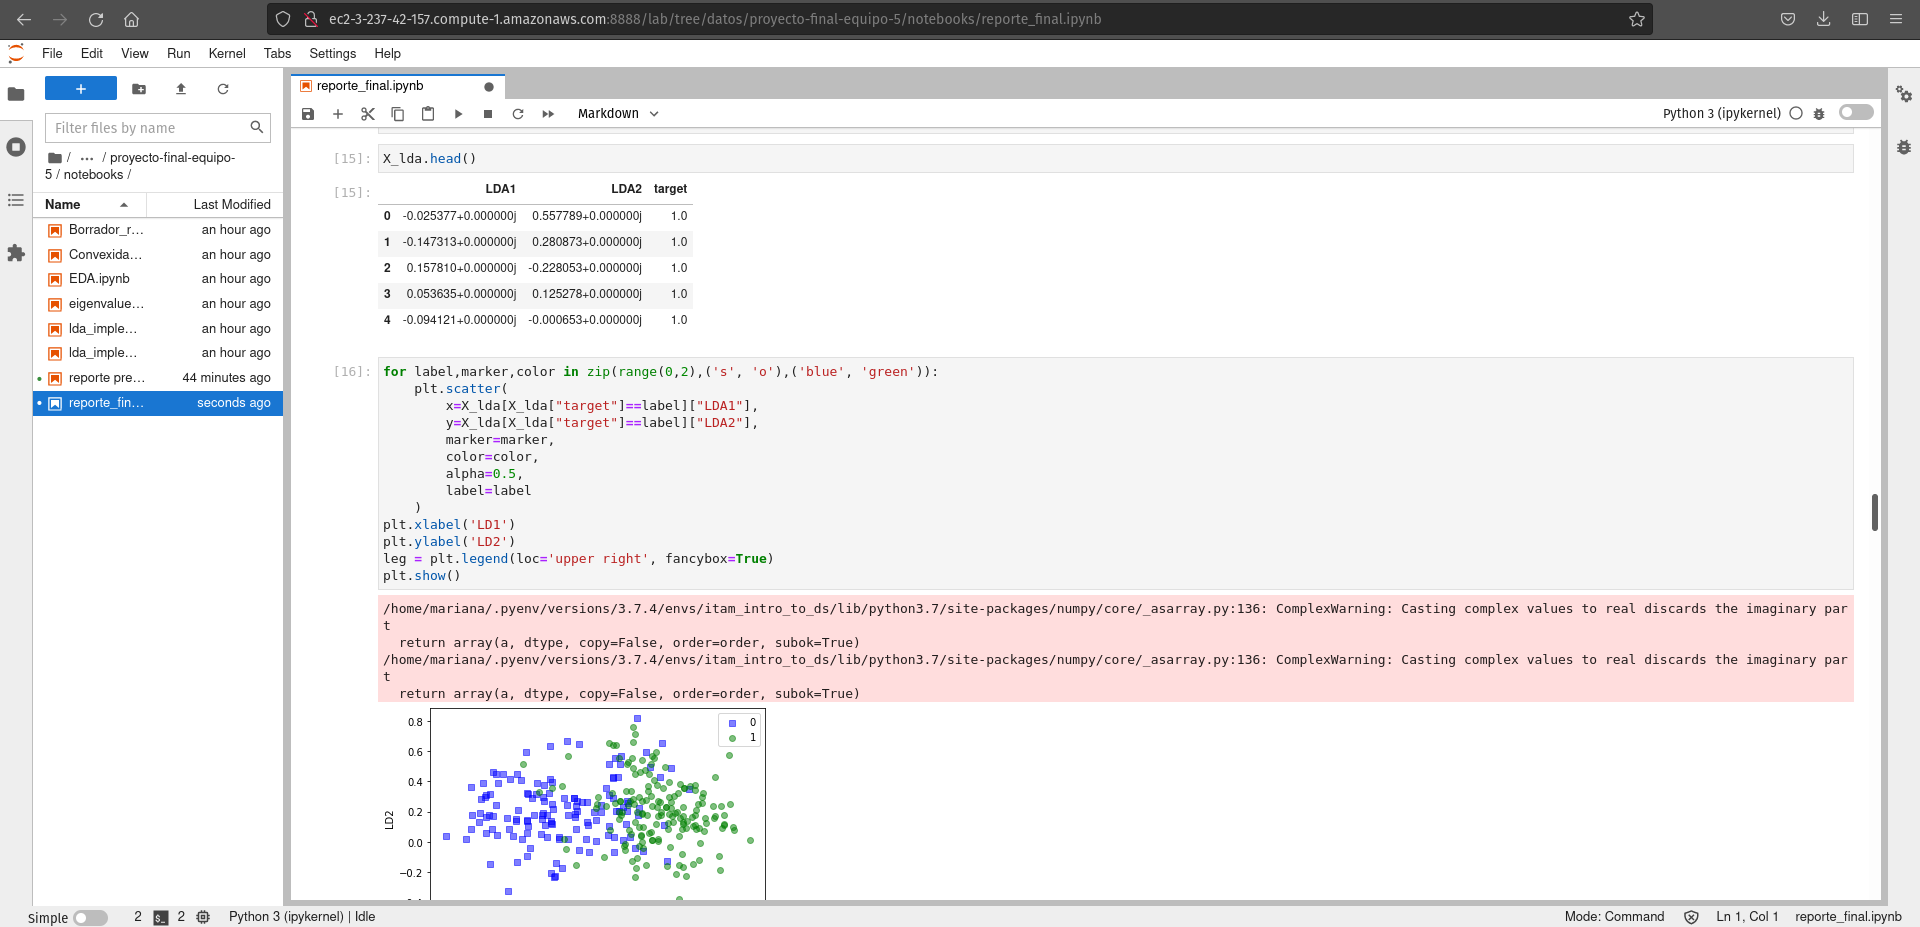

In [6]:
Image(filename='imagenes/resultados.png')